## An Original Analysis & ML Skill demo

### prepared by Parker Roller, Data Scientist @ IBM

#### 10/30

Thanks for checking out my notebook! I created this notebook over the course of 3 days this week spending about 4 hours analysis and all on it. 

If you like this work or it helped you on your ML journey in someway, feel free to reach out!


In [1]:
#Importing useful libraries, try to keep it at a minimum

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer() #loads as a bunch object

In [3]:
data.data.shape #features

(569, 30)

In [4]:
data.target.shape #target

(569,)

In [5]:
df = data.data.copy() # create copy to keep og data pristine

In [6]:
cols_w_no_space = ["_".join(col.split(" ")) for col in data.feature_names]
# personally don't like spaces and I know there are spaces
print(cols_w_no_space)

['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'radius_error', 'texture_error', 'perimeter_error', 'area_error', 'smoothness_error', 'compactness_error', 'concavity_error', 'concave_points_error', 'symmetry_error', 'fractal_dimension_error', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']


In [7]:
df = pd.DataFrame(df, columns = cols_w_no_space)

In [8]:
df['diagnosis'] = data.target.copy() 

In [9]:
df['diagnosis'] = df['diagnosis'].map({
    0:'malignant',
    1:'benign'
}) #make sure this is the proper mapping


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

In [11]:
df.columns.isna().any() #asking the df if ANY entry ISNA (missing)

False

In [12]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean_compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean_concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean_concave_points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean_symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean_fractal_dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


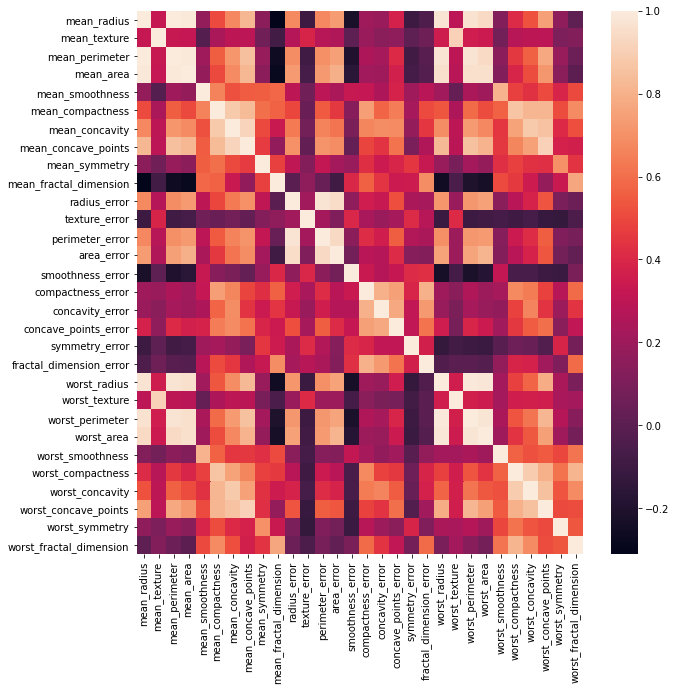

In [14]:

fig,ax = plt.subplots(figsize = (10,10))

sns.heatmap(df.corr())

### What now?

Well, we have a df with 30 features and 1 predictor so 31 columns in total. The only non-numerical column is the categorical predictor. We have 569 records to use to try to extract information out of. From our intial peaks at `df.corr()` and the heatmap, we can see some very high levels of cross correlation amidst our features. That probably means we got some _multicollinearity_ goin on up in here. We'll do some further tests on that hypothesis next & decide how to deal with it before we train any models.  

In [15]:
grouped = df.groupby('diagnosis', axis = 0)

In [16]:
grouped.mean()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
diagnosis,,,,,,,,,,,,,,,,,,,,,
benign,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
malignant,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [17]:
grouped.var()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
diagnosis,,,,,,,,,,,,,,,,,,,,,
benign,3.170222,15.961021,139.415582,18033.030100,0.000181,0.001139,0.001887,0.000253,0.000615,0.000046,...,3.925817,30.183536,182.982188,26765.425899,0.000401,0.008497,0.019703,0.001281,0.001743,0.000191
malignant,10.265431,14.284393,477.625870,135378.355365,0.000159,0.002915,0.005628,0.001182,0.000764,0.000057,...,18.348967,29.537095,867.718099,357565.421850,0.000478,0.029027,0.032945,0.002144,0.005578,0.000465


So now we have seen the difference in the two targets. The figures are confirming the intuition that you probably already have which says cancerous tumors are typically larger and "less-regular". If the goal here was to explore variable relationships, we would want to examine further with graphics, but we'll continue since our goal is to get to machine learning in this notebook

##### Now..... about that multicollinearity

This is a big problem for us if we want to try to fit pretty much any kind of model. Well why so you might say? Multicollinearity is a state which says one or more of our predictor variables (features) is a linear combination of at least one of the others. For our case, that would mean you could write `mean_perimeter = a * mean_radius + b` and the formula be pretty good estimate of `mean_perimeter`. 

For my mathematicians out there, multicollinearity is equivalent to the predictor matrix $X^TX$ being computationally indeterminate; ie computationally singular. Which of course we need for _basically any_ linear regression. So our choice is to either try and remove the problem variables OR to choose a model that's unimpacted by this such as XGboost

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
features = df.drop(columns = 'diagnosis').copy()

In [20]:
features

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [21]:
vif = pd.DataFrame(columns = ['VIF','Variable'])

vif['VIF'] = [variance_inflation_factor(features.values,i) for i in range(len(features.columns))]
vif['Variable'] = features.columns

vif.sort_values('VIF',ascending = False)
min_ = min(vif['VIF'].values)

vif['VIFx'] = vif['VIF'].apply(lambda x: round((x/min_),2))

In [22]:
vif.sort_values(by = 'VIFx', ascending = False) # does not look good for our linear models

,VIF,Variable,VIFx
0,63306.172036,mean_radius,2565.56
2,58123.586079,mean_perimeter,2355.53
20,9674.742602,worst_radius,392.08
22,4487.781270,worst_perimeter,181.87
3,1287.262339,mean_area,52.17
23,1138.759252,worst_area,46.15
9,629.679874,mean_fractal_dimension,25.52
29,423.396723,worst_fractal_dimension,17.16
4,393.398166,mean_smoothness,15.94
24,375.597155,worst_smoothness,15.22


We check not only the VIF of the columns here but also the relative VIF to the minimum. This is the approach I take and personally reccomend. As a heuristic, I was taugh a relative VIF of higher than 5 should warrant extreme care. Probably because this was demonstrated empirically by meta-statistic researchers, but I don't care enough right now to find you the paper. 

### Anyways....

####  _let's do some machine learning now_ 

Well actually, let's talk about machine learning first. That is the most important part, after all. Machine learning encompasses a *TON* of tasks and objectives. Ours, is to try to classify as (careful here) _well_ as possible if a tumor is cancerous or not. So if something is or something isn't means only two states. Which is quite possibly the most verbose way for me to say it's a binary classification task. 

We should go ahead and decide now what kinds of models we want to try out right now since that may change out we process the data. I pick () models below to try and talk about why I chose them.


**LINEAR MODELS:** out. Not even gonna think twice about them bc of the VIF analysis. 

**SVM:** This model is the first to pop in my head because it is computationally simple model for our $pxn$, though things might get hairer if the dataset were of a more realistic size. However, it's also a very strong candidate in my mind precisely bc of the multicollinearity (supposing we choose the proper kernel). Since there is high VIF in many variables, this implies many variables are linear combinations of other variables, which would imply the data stands a *decent* chance of being *approximately linearly separable*. Blah blah blah data good for svm

**Nearest Neighbors:** Similiarly to SVM, it stands to reason that maybe in some dimension we can't possibly imagine there are two multidimensional surfaces that encompass well our two classes. This is just of course a geometric view of the NN approach with the voting neighbors & euclidean distance. 

**Trees & Boosted Classifers:** try these because they have a history of being good binary classification alogrithms & are computationally simple 



I am so done typing letters but per usual we gotta prep the data before we can do any classification. Ima do that now.

In [23]:
X = data.data.copy(); y = data.target.copy()

In [24]:
from sklearn.model_selection import train_test_split
rstate = 9000

In [25]:
#gotta split into training data and validation data

train_x,test_x,train_y, test_y = train_test_split(X,y,train_size = 0.8,random_state = rstate)

train_x.shape

(455, 30)

In [26]:
# Now we'll scale our data. Since it's all numeric & there's no missing values, this will be the only preprocessing step

from sklearn.preprocessing import RobustScaler
# Not using StandardScaler as it implicitly makes parametric assumptions

rs = RobustScaler()

train_trans = rs.fit_transform(train_x)

In [27]:
# Import the Models
from sklearn.experimental import enable_hist_gradient_boosting # have to import this to get access to LightGBM
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, VotingClassifier

In [28]:
# Setting up the Classifiers

# don't worry so much about parameters here

svc_clf = SVC(
    C = 1/2, # start with somewhat stiff regularization to prevent overfitting
)

knn_clf = KNeighborsClassifier(
    weights = 'distance', # closer neighbors get stronger say
    p = 2 # default value: indicates we are taking the square of the vector norm from p2p. IE euclidean distance
)

tree_clf = DecisionTreeClassifier(random_state = rstate
)

lgbm_clf = HistGradientBoostingClassifier(random_state = rstate 
)

models = [svc_clf,knn_clf,tree_clf,lgbm_clf]

In [29]:
model_labels = ['SVC','KNN','Decision_Tree', 'LGBM']
models_dict = {name:model for name,model in zip(model_labels,models)}

In [30]:
# Start the pipeline block

from sklearn.pipeline import Pipeline

#line = Pipeline([
#    ('robust_scaler',RobustScaler()),
    # ...
#])

In [32]:
# This time, we will skip setting up Cross Validation but after we have picked a winning model we can fine tune it
from sklearn.metrics import f1_score,roc_curve
test_accs = [];train_accs =[];f1 =[];fpr = [];tpr = [] ;threshs = [] #? threshes
for label, model in models_dict.items():
    tpipe = Pipeline([
        ('robust_scaler',RobustScaler()),
        (label, model)
    ])
    
    tpipe.fit(train_x,train_y)
    train_preds = tpipe.predict(train_x)
    test_preds = tpipe.predict(test_x)
    
    train_accs.append((train_preds == train_y).mean())
    test_accs.append((test_preds == test_y).mean())
    
    f1.append(f1_score(train_y, train_preds))
    
    tfpr,ttpr, thresh = roc_curve(train_y, train_preds)
    fpr.append(tfpr); tpr.append(ttpr); threshs.append(thresh)
    
    print('{} fit and estimation complete'.format(label))
    

SVC fit and estimation complete
KNN fit and estimation complete
Decision_Tree fit and estimation complete
LGBM fit and estimation complete


In [35]:
eval_df = pd.DataFrame(
    data = {
        'model': list(models_dict.keys()),
        'training_accuracy': train_accs,
        'test_accuracy': test_accs,
        'f1score': f1,
        'false_positive_rate':fpr,
        'true_positive_rate':tpr,
        'thresholds':threshs
    }
)

eval_df

,model,training_accuracy,test_accuracy,f1score,false_positive_rate,true_positive_rate,thresholds
0,SVC,0.978022,0.991228,0.982456,"[0.0, 0.05714285714285714, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]"
1,KNN,1.000000,0.964912,1.000000,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]"
2,Decision_Tree,1.000000,0.947368,1.000000,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]"
3,LGBM,1.000000,0.964912,1.000000,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]"


In [40]:
#Hmm, the above code sure was useful. We should functionify it
def debunch_data(data = None,rstate = 9000):
    """
    helper function for evaluate_models that takes sklearn data bunch and returns split train & test df & targets
    
    :params:
        @data: sklearn data object bunch
        @rstate: random generator seed integer
    """
    if not data:
            print('You forgot to put the data in, dummy')
            raise NameError('DummyError')
        
    if isinstance(data,object):
        try:
            train_x, test_x, train_y, test_y = train_test_split(data.data,
                                                                data.target,
                                                                train_size = 0.8,
                                                                random_state = rstate)
            
            return train_x, test_x, train_y, test_y 
        
        except AttributeError:
            print('Data is not formatted to expectation. Should be data bunch object synonymous with sklearn.')
            return None
    else:
        print('Data is not formatted to expectation. Should be data bunch object synonymous with sklearn.')
        raise TypeError

def evaluate_models(mldata = None,model_labels = None, models = None, scaler = RobustScaler(), random_state = 9000):
    """
    Takes list inputs & RobustScaler preprocessing models and returns evaluation df of models 
    
    :pararms:
        @mldata: sklearn like data bunch for ML task
        @model_labels: list of string model labels
        @models: list of sklearn classifier objects
        @scaler: sklearn.preprocessing scaler object
        @random_state: random generator seed
    """
   ## model_dictionary = {label:model for label, model in zip(model_labels, models)} redundant upon inspection

    #gotta get data and debunch here
    
    train_x, test_x, train_y, test_y = debunch_data(data = mldata, rstate = random_state)

    test_accs = [];train_accs =[];f1 =[];fpr = [];tpr = [] ;threshs = []
    for label, model in zip(model_labels, models):
        tpipe = Pipeline([
            ('robust_scaler',scaler),
            (label, model)
        ])

        tpipe.fit(train_x,train_y)
        train_preds = tpipe.predict(train_x)
        test_preds = tpipe.predict(test_x)

        train_accs.append((train_preds == train_y).mean())
        test_accs.append((test_preds == test_y).mean())

        f1.append(f1_score(train_y, train_preds))

        tfpr,ttpr, thresh = roc_curve(train_y, train_preds)
        fpr.append(tfpr); tpr.append(ttpr); threshs.append(thresh)

        print('{} fit and estimation complete'.format(label))

    eval_df = pd.DataFrame(
        data = {
            'model': model_labels,
            'training_accuracy': train_accs,
            'test_accuracy': test_accs,
            'f1score': f1,
            'false_positive_rate':fpr,
            'true_positive_rate':tpr,
            'thresholds': threshs
        }
    )

    return eval_df, [train_x,test_x,train_y,test_y]

In [41]:
eval_df, _ = evaluate_models(mldata = data, model_labels = model_labels, models = models)

SVC fit and estimation complete
KNN fit and estimation complete
Decision_Tree fit and estimation complete
LGBM fit and estimation complete


In [43]:
len(_) # list of 4 dfs for fine tuning now

4

In [44]:
eval_df

,model,training_accuracy,test_accuracy,f1score,false_positive_rate,true_positive_rate,thresholds
0,SVC,0.978022,0.991228,0.982456,"[0.0, 0.05714285714285714, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]"
1,KNN,1.000000,0.964912,1.000000,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]"
2,Decision_Tree,1.000000,0.947368,1.000000,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]"
3,LGBM,1.000000,0.964912,1.000000,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]"


In [45]:
# to be continued ... fine tuning with ParamGrid objects and computational optimization through parallel processing!